<a href="https://colab.research.google.com/github/aguusandy/ic_2023/blob/master/inteligencia_guia7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Guia 7 Práctica IC 2023

# Ejercicio 1:
Implemente un algoritmo de optimizacion por enjambre de partıculas
y utilıcelo para encontrar el mınimo global de las funciones del Ejercicio 1 de la Guıa de trabajos practicos 6.
Compare los resultados en relacion a los obtenidos con algoritmos geneticos, en terminos de las soluciones encontradas y la velocidad de convergencia.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f1(x):
  x = x[0]
  return (-1)*x*np.sin(np.sqrt(np.abs(x)))
def f2(v):
  x=v[0]; y=v[1]
  return ((x**2 + y**2)**(0.25))*( np.sin(50*((x**2 + y**2)**(0.1)))**2 + 1)

In [ ]:
def enjambre(particulas,f,c1,c2,minimo_buscado,iter_max):
    cantidad_particulas,dimensiones =particulas.shape
    particulas_mejor_posicion_individual = particulas
    mejor_posicion_global = particulas[0]
    velocidad_particulas = (np.random.rand(cantidad_particulas,dimensiones)-0.5)
    iter = 0
    while(f(mejor_posicion_global)>minimo_buscado  and iter != iter_max):
        for i in np.arange(0,cantidad_particulas):
            if (f(particulas[i])<f(particulas_mejor_posicion_individual[i])):
                particulas_mejor_posicion_individual[i] = particulas[i]
            if (f(particulas_mejor_posicion_individual[i])<f(mejor_posicion_global)):
                mejor_posicion_global = particulas_mejor_posicion_individual[i]
        for i in np.arange(cantidad_particulas):
            for j in np.arange(dimensiones):
                r = np.random.rand(2)
                velocidad_particulas[i][j]+= c1*r[0]*(particulas_mejor_posicion_individual[i][j]-particulas[i][j]) + c2*r[1]*(mejor_posicion_global[j]-particulas[i][j])
                particulas[i] += velocidad_particulas[i][j]
        iter +=1
    return mejor_posicion_global,iter

In [ ]:
cantidad_particulas = 200
dimensiones = 1
minimo_buscado = -10000
particulas = (np.random.rand(cantidad_particulas,dimensiones)*500 - 250)
c1 = 0.5 ; c2= 0.5 ; iter_max = 500
mejor_posicion_global,iter = enjambre(particulas,f1,c1,c2,minimo_buscado,iter_max)

Cantidad de iteraciones:  18
Individuo con mejor fitness:  [38660.23716137]
Mejor fitness encontrado:  -37233.44500319271


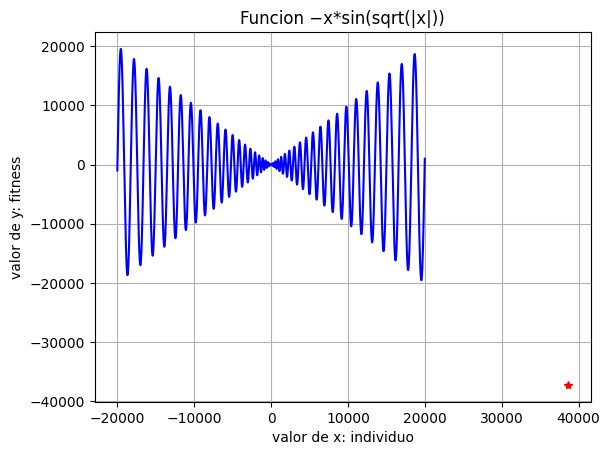

In [ ]:
print('Cantidad de iteraciones: ',iter)
print('Individuo con mejor fitness: ',mejor_posicion_global)
print('Mejor fitness encontrado: ',f1(mejor_posicion_global))
x = np.linspace(-20000, 20000,num=10000)
y = f1([x])
plt.plot(x,y,'b-')
plt.plot(mejor_posicion_global,f1(mejor_posicion_global),'*r')
plt.title('Funcion −x*sin(sqrt(|x|))')
plt.xlabel('valor de x: individuo')
plt.ylabel('valor de y: fitness')
plt.grid() ;plt.show()

In [ ]:
cantidad_particulas = 200
dimensiones = 2
minimo_buscado = 1.5
particulas = (np.random.rand(cantidad_particulas,dimensiones)*500 - 250)

c1 =  0.01; c2= 0.01 ; iter_max = 1000
mejor_posicion_global,iter = enjambre(particulas,f2,c1,c2,minimo_buscado,iter_max)

Cantidad de iteraciones:  27
Individuo con mejor fitness:  [-1.59227869  1.02179048]
Mejor fitness encontrado:  1.4607880143927816


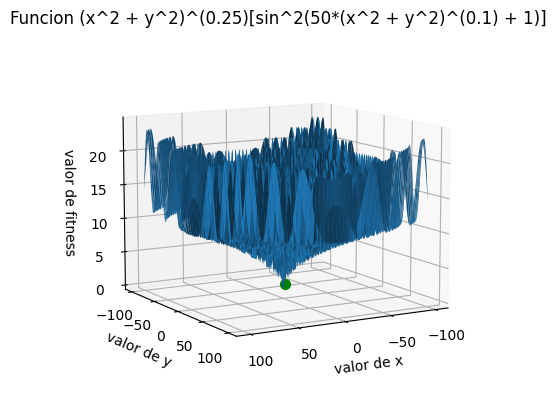

In [ ]:
print('Cantidad de iteraciones: ',iter)
print('Individuo con mejor fitness: ',mejor_posicion_global)
print('Mejor fitness encontrado: ',f2(mejor_posicion_global))
x = y = np.linspace(-100, 100,num=200)
x, y = np.meshgrid(x, y)
z = f2([x,y])
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
surf = ax.plot_surface(x, y, z)
ax.scatter(mejor_posicion_global[0], mejor_posicion_global[1], f2([mejor_posicion_global[0],mejor_posicion_global[1]]), color='green', s=50)
ax.set_title('Funcion (x^2 + y^2)^(0.25)[sin^2(50*(x^2 + y^2)^(0.1) + 1)]')
ax.set_xlabel('valor de x')
ax.set_ylabel('valor de y')
ax.set_zlabel('valor de fitness')
ax.view_init(elev=10, azim=60) ; plt.show()

# Ejercicio 2:
Suponga que un viajante tiene que visitar n ciudades en el menor
tiempo posible.  

*   Considere una matriz D de tamaño n×n
*   cuyos elementos dpq denotan la distancia entre cada par de ciudades (p, q)
*   Se define un recorrido como una trayectoria cerrada que visita cada ciudad una y solo una vez (a excepcion de la ciudad de partida, a la cual debe regresar)

El problema consiste en hallar el recorrido de mınima longitud.
Analice el efecto de la tasa de evaporacion (ρ) y de la cantidad de feromona depositada (τ ) sobre los resultados de la busqueda. Para esto ultimo compare el desempeño del algoritmo empleando los metodos global, local y uniforme para deposito de feromonas.

In [25]:
# le paso el vector de probabilidades y la probabilidad al azar, tomo aquella probabilidad que más cerca esté de la azar
def mas_parecido(probabilidades,probabilidad):
  cant_probabilidades = len(probabilidades)
  distancias = (probabilidades[:]-probabilidad)**2
  return np.argmin(distancias)

In [153]:
# funcion que se encarga de calcular el proximo nodo a partir de las probabilidades de aquellos noods que no visito la hormiga
def calcular_proximo_nodo(a,b,nodo_i,matriz_feromonas,nodos_sin_visitar,d):
  probabilidades = np.full(len(nodos_sin_visitar),None)
  for j in np.arange(0,len(nodos_sin_visitar)):
    nodo_j = nodos_sin_visitar[j]
    probabilidad_j = (matriz_feromonas[nodo_i,nodo_j]**a) * ((1 / d[nodo_i,nodo_j])**b)
    sumatoria_feromonas = np.sum( (matriz_feromonas[nodo_i,:]**a)*((1 / d[nodo_i,nodo_j])**b) )
    probabilidad_j = probabilidad_j / sumatoria_feromonas
    probabilidades[j] =  probabilidad_j
  # print('probabilidades')
  # print(probabilidades)
  # tomo una probabilidad al azar y eligo el nodo que tenga dicha probabilidad
  prob = np.random.rand()
  # print('probabilidad azar: ',prob)
  pos = mas_parecido(probabilidades,prob)
  proximo_nodo = nodos_sin_visitar[pos]
  # elimino ese camino del vector de nodos sin visitar
  nodos_sin_visitar2 = np.delete(nodos_sin_visitar,pos)

  return proximo_nodo,nodos_sin_visitar2

In [ ]:
a = 2
b = 1
nodo_i = 1
feromonas = np.random.rand(7,7)
print('feromonas ')
print(feromonas)
nodos_sin_visitar = np.arange(2,7)
print('nodos sin visitar ',nodos_sin_visitar)
d = np.genfromtxt("gr17.csv", delimiter="," )
proximo_nodo,nodos_sin_visitar2 = calcular_proximo_nodo(a,b,nodo_i,feromonas,nodos_sin_visitar,d)
print(proximo_nodo)
print(nodos_sin_visitar2)

In [84]:
def calcular_longitudes_caminos(c,d):
  cant_caminos = len(c)
  distancias = np.zeros(cant_caminos)
  for i in np.arange(0,cant_caminos):
    sum = 0
    for j in np.arange(0,len(c[i])-1):
      sum+= d[int(c[i][j]),int(c[i][j+1])]
    distancias[i]+= sum
  return distancias

In [4]:
# funcion que le paso los caminos que tomaron las hormigas y las distancias entre nodos retorna el camino cuya distancia es mejor
def calcular_mejor_camino(c,d):
  longitudes = calcular_longitudes_caminos(c,d)
  ind_min_dist = np.argmin(longitudes)
  return c[ind_min_dist]

In [5]:
# funcion que se retorna verdadero si los caminos de las hormigas son el mismo
def mismo_camino(c):
  bandera = True
  for i in np.arange(1,len(c)):
    if np.array_equal(c[0],c[i]) == False:
      bandera = False
      break
  return bandera

In [169]:
def pertenece_camino(camino,nodo_i,nodo_j):
  pos = np.where(camino[:-1]==nodo_i)[0]
  # print('pos :',pos,'nodo i ',nodo_i,' nodo j ',nodo_j)
  # print('camino: ',camino)
  if len(pos) != 0 and pos[0]+1 < len(camino) and camino[pos+1] == nodo_j:
    return True
  return False

In [163]:
p = np.array([0,1,2,4,5])
print(p)
p2 = pertenece_camino(p,5,8)
print(p2)
print(np.arange(1,17)[:-1])

[0 1 2 4 5]
pos : [4] nodo i  5  nodo j  8
camino:  [0 1 2 4 5]
False
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [167]:
# Algoritmo 2: Sistema de hormigas (AS)
def sistemas_hormigas(cant_hormigas,tipo_feromona,Q,a,b,p_feromona,distancias,max_iteraciones):

  # PASO 1:
  size_d = len(distancias)                    # tamaño de la matriz d -> d = matriz de distancias
  feromonas = np.random.rand(size_d,size_d)   # σij: feromonas en la conexión entre i y j

  # PASO 2:
  caminos = np.full(cant_hormigas,None)       # caminos de cada una de las hormigas

  # PASO 3:
  iteracion = 0
  bandera = False
  while iteracion < max_iteraciones and bandera == False:
    # PASO 3.1: para cada hormiga k = 1, 2, . . . ,N
    for k in np.arange(0,cant_hormigas):
      # PASO 3.1.1:
      camino_actual_k = np.zeros(size_d+1) # agrego al final el nodo inicial tambien porque tengo que finalizar en el mismo que arranque
      nodos_por_visitar = np.arange(1,size_d) # lista con todos los vecinos posibles a visitar, no pongo el 0 porque ahi arranca
      # PASO 3.1.2: repetir hasta alcanzar el destino -> repito la misma cantidad de destinos, ya que tengo que recorrerlos a todos
      for i in np.arange(1,size_d):
        # seleccionar el próximo nodo según la probabilidad ->
        # le paso el nodo actual, la matriz de feromonas y la lista de no visitados y la matriz de distancia
        proximo_nodo,nodos_por_visitar2 = calcular_proximo_nodo(a,b,int(camino_actual_k[i-1]),feromonas,nodos_por_visitar,distancias)
        nodos_por_visitar = nodos_por_visitar2
        # agregar un paso (i, j) al camino pk(t)
        camino_actual_k[i] = proximo_nodo
      # agrego el camino de la hormiga a la lista
      caminos[k] = camino_actual_k

    # PASO 3.1.3: calcular la longitud del camino econtrado f(pk(t))
    longitudes_caminos = calcular_longitudes_caminos(caminos,distancias)

    # PASO 3.2: para cada conexión (i, j)
    # reducir por evaporación la cantidad de feromonas: σij(t) ← (1 − ρ)σij(t)
    feromonas = feromonas*(1-p_feromona)
    for i in np.arange(0,size_d):
      for j in np.arange(0,size_d):
        # depositar feromonas proporcionalmente a la bondad de la solución
        # tipo_feromona == 0 -> uniforme Q
        # tipo_feromona == 1 -> global = d_feromona = Q/f(pk(t))
        # tipo_feromona == 2 -> local Q/dij
        suma_deltas = 0
        for k in np.arange(0,len(caminos)):
          if i != j and pertenece_camino(caminos[k],i,j):
            d_feromona = Q
            if tipo_feromona == 1:
              d_feromona = d_feromona / calcular_longitudes_caminos([caminos[k]],distancias)
            elif tipo_feromona == 2:
              d_feromona = Q/d[i,j]
            suma_deltas+= d_feromona
        feromonas[i,j]+= suma_deltas
    mejor_camino = calcular_mejor_camino(caminos,distancias)
    if mismo_camino(caminos) == True:
      bandera = True
    iteracion+=1
  print('cantidad de iteraciones: ',iteracion)
  return mejor_camino

In [26]:
# importar los datos de la matriz d
D = np.genfromtxt("gr17.csv", delimiter="," )

In [170]:
# estructuras de datos del algoritmo

cantidad_hormigas = 100     # cantidad de hormigas
feromona = 1                # tipo de feromona que van a dejar -> 0 uniforme, 1 global, 2 local
delta_feromona = 0.05       # constante para la evaporacion de feromona
max_it = 2000
a = 1
b = 0.75
Q = 2
# sistemas_hormigas( cant_hormigas,tipo_feromona,Q,a,b,p_feromona,distancias,max_iteraciones )
mejor_camino = sistemas_hormigas(cantidad_hormigas,feromona,Q,a,b,delta_feromona,D,max_it)

In [173]:
print('mejor camino encontrado: ',mejor_camino)
print('distancia del mejor camino: ',calcular_longitudes_caminos([mejor_camino],D))

mejor camino encontrado:  [ 0. 16.  2. 14.  3.  7.  8. 15. 13.  5. 11. 10.  6.  4.  1.  9. 12.  0.]
distancia del mejor camino:  [4074.]
